<a href="https://colab.research.google.com/github/Mmkdstaz/kaggle/blob/main/aircraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faa/wildlife-strikes")

print("Path to dataset files:", path)

100%|██████████| 4.83M/4.83M [00:00<00:00, 89.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/faa/wildlife-strikes/versions/1


In [ ]:
import pandas as pd
import os
df = pd.read_csv(os.path.join(path, "database.csv"))
df.head()

/tmp/ipython-input-2743471642.py:3: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, "database.csv"))


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(174104, 66)

In [ ]:
cat_features = df.select_dtypes('object').columns.tolist()
num_features = df.select_dtypes('number').columns.tolist()
cat_features

['Operator ID',
 'Operator',
 'Aircraft',
 'Aircraft Type',
 'Aircraft Make',
 'Aircraft Model',
 'Engine Model',
 'Engine Type',
 'Engine1 Position',
 'Engine3 Position',
 'Airport ID',
 'Airport',
 'State',
 'FAA Region',
 'Warning Issued',
 'Flight Phase',
 'Visibility',
 'Precipitation',
 'Species ID',
 'Species Name',
 'Species Quantity',
 'Flight Impact']

In [ ]:
df[cat_features].isnull().sum()

,0
Operator ID,0
Operator,0
Aircraft,0
Aircraft Type,41030
Aircraft Make,43053
Aircraft Model,51665
Engine Model,52116
Engine Type,46822
Engine1 Position,47911
Engine3 Position,162445


In [ ]:
df[num_features].fillna(df[num_features].median(), inplace=True)

/tmp/ipython-input-1068391125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_features].fillna(df[num_features].median(), inplace=True)


In [ ]:
# Предположим, num_features — список числовых колонок
cols_with_na = df[num_features].columns[df[num_features].isnull().sum() > 0]
print(cols_with_na)


Index(['Aircraft Mass', 'Engine Make', 'Engines', 'Engine2 Position',
       'Engine4 Position', 'Height', 'Speed', 'Distance', 'Fatalities',
       'Injuries'],
      dtype='object')


In [ ]:
df[num_features].head()

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,4.0,34.0,2.0,1.0,1.0,50.0,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,4.0,34.0,2.0,5.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,4.0,22.0,2.0,1.0,1.0,50.0,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,3.0,22.0,2.0,1.0,1.0,200.0,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,4.0,22.0,2.0,1.0,1.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Для всех числовых колонок с пропусками
for col in cols_with_na:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
for col in cat_features:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum().sum()

np.int64(0)

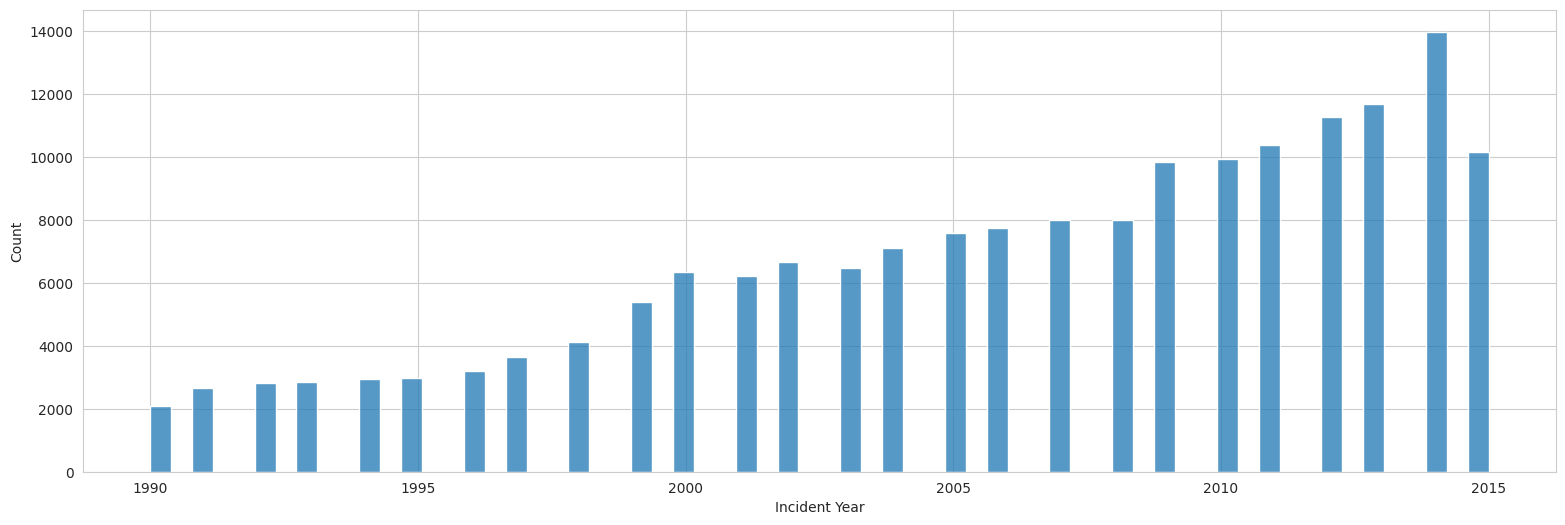

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(19, 6))
sns.histplot(df['Incident Year'])
plt.show()

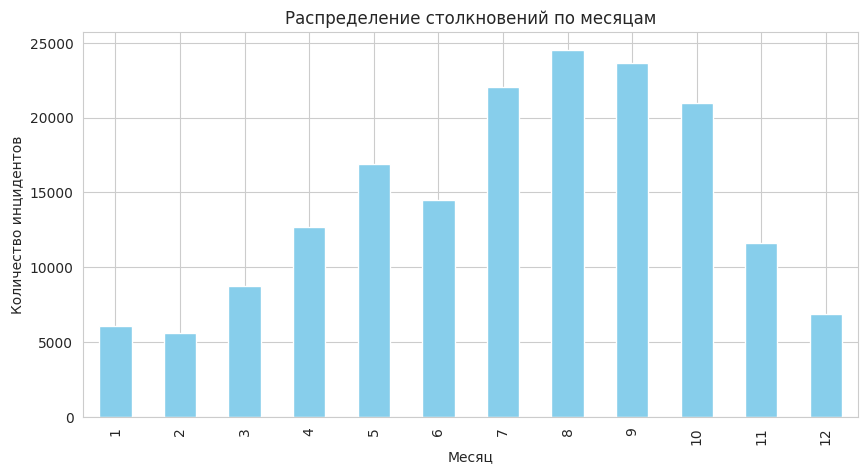

In [ ]:
# Создадим колонку с месяцем, если её ещё нет
df['Incident Month'] = pd.to_numeric(df['Incident Month'], errors='coerce')

# Группировка по месяцам
monthly_counts = df.groupby('Incident Month').size()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title("Распределение столкновений по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество инцидентов")
plt.show()


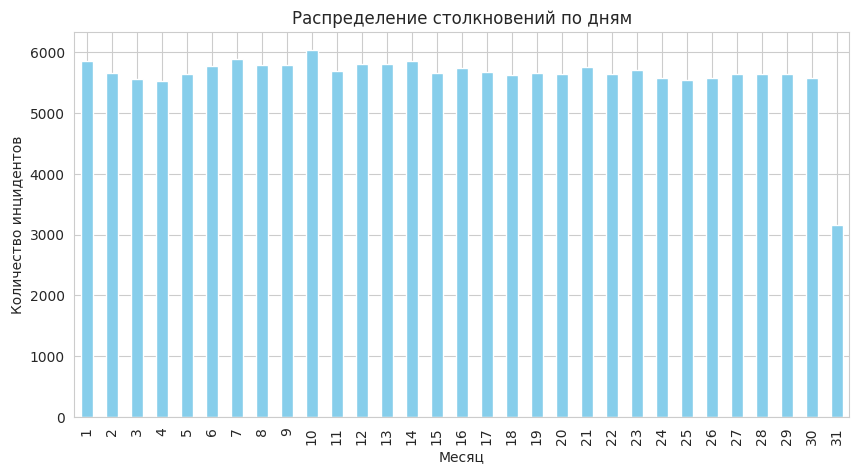

In [ ]:
# Создадим колонку с месяцем, если её ещё нет
df['Incident Day'] = pd.to_numeric(df['Incident Day'], errors='coerce')

# Группировка по месяцам
monthly_counts = df.groupby('Incident Day').size()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title("Распределение столкновений по дням")
plt.xlabel("Месяц")
plt.ylabel("Количество инцидентов")
plt.show()


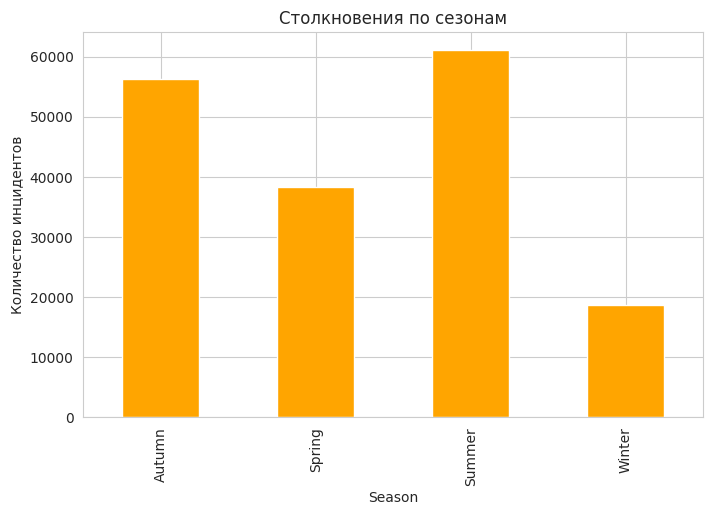

In [ ]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Incident Month'].apply(month_to_season)
season_counts = df.groupby('Season').size()

season_counts.plot(kind='bar', color='orange', figsize=(8,5), title='Столкновения по сезонам')
plt.ylabel('Количество инцидентов')
plt.show()


In [ ]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage,Season
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,1,1,0,0,0,0,Winter
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,1,0,Winter
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,A,148,24.0,...,0,0,0,0,0,0,0,0,0,Winter
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,24.0,...,0,0,0,0,0,0,0,0,0,Winter
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,24.0,...,0,0,0,0,0,0,0,0,0,Winter


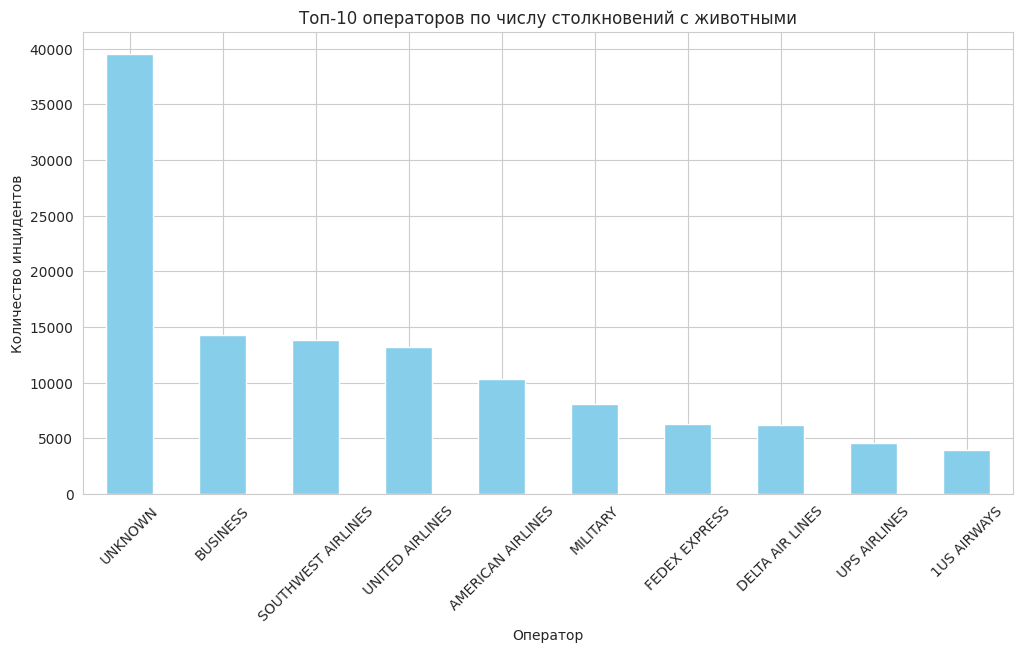

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Считаем количество инцидентов по оператору
operator_counts = df['Operator'].value_counts().head(10)

# Построение графика
plt.figure(figsize=(12,6))
operator_counts.plot(kind='bar', color='skyblue')
plt.title("Топ-10 операторов по числу столкновений с животными")
plt.xlabel("Оператор")
plt.ylabel("Количество инцидентов")
plt.xticks(rotation=45)
plt.show()


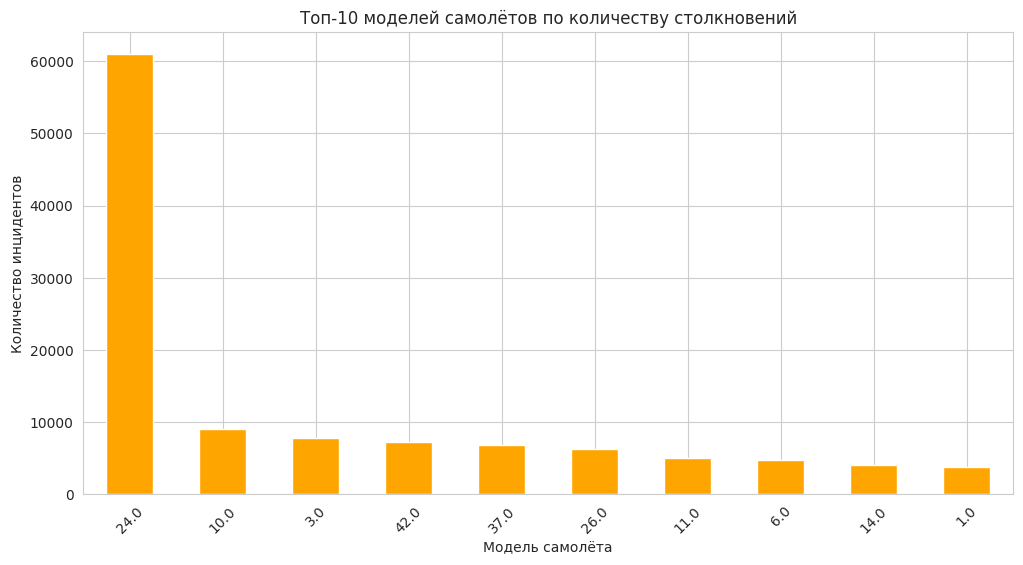

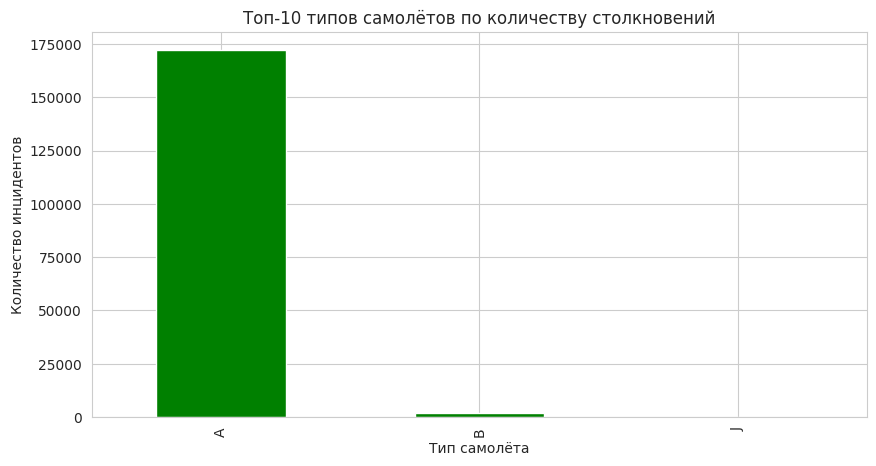

In [ ]:
# Топ-10 моделей самолётов
top_aircraft_models = df['Aircraft Model'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_aircraft_models.plot(kind='bar', color='orange')
plt.title("Топ-10 моделей самолётов по количеству столкновений")
plt.xlabel("Модель самолёта")
plt.ylabel("Количество инцидентов")
plt.xticks(rotation=45)
plt.show()

# Аналогично для типов самолётов
top_aircraft_types = df['Aircraft Type'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_aircraft_types.plot(kind='bar', color='green')
plt.title("Топ-10 типов самолётов по количеству столкновений")
plt.xlabel("Тип самолёта")
plt.ylabel("Количество инцидентов")
plt.show()


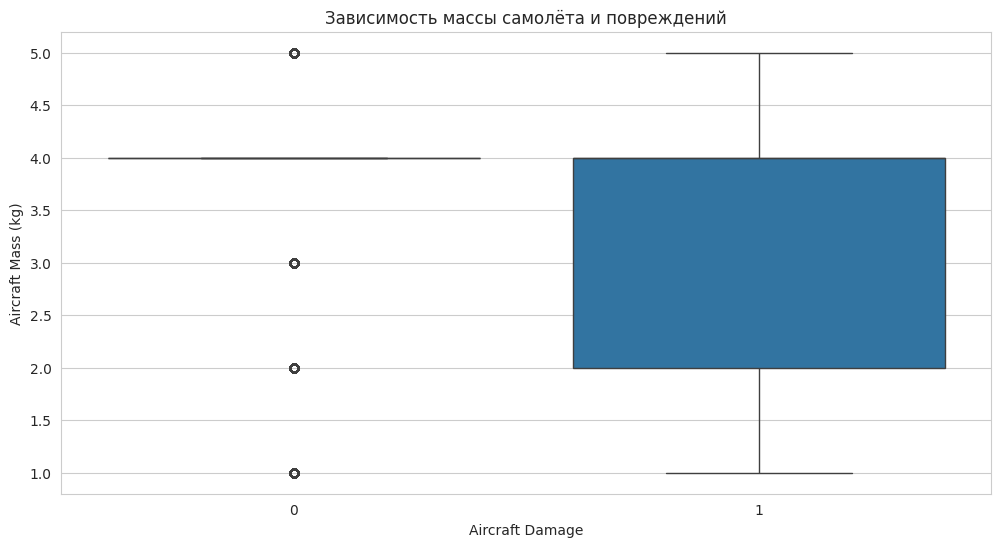

In [ ]:
import seaborn as sns

# Преобразуем Aircraft Mass в числовой тип
df['Aircraft Mass'] = pd.to_numeric(df['Aircraft Mass'], errors='coerce')

# Построение boxplot: масса vs уровень повреждений
plt.figure(figsize=(12,6))
sns.boxplot(x='Aircraft Damage', y='Aircraft Mass', data=df)
plt.title("Зависимость массы самолёта и повреждений")
plt.xlabel("Aircraft Damage")
plt.ylabel("Aircraft Mass (kg)")
plt.show()


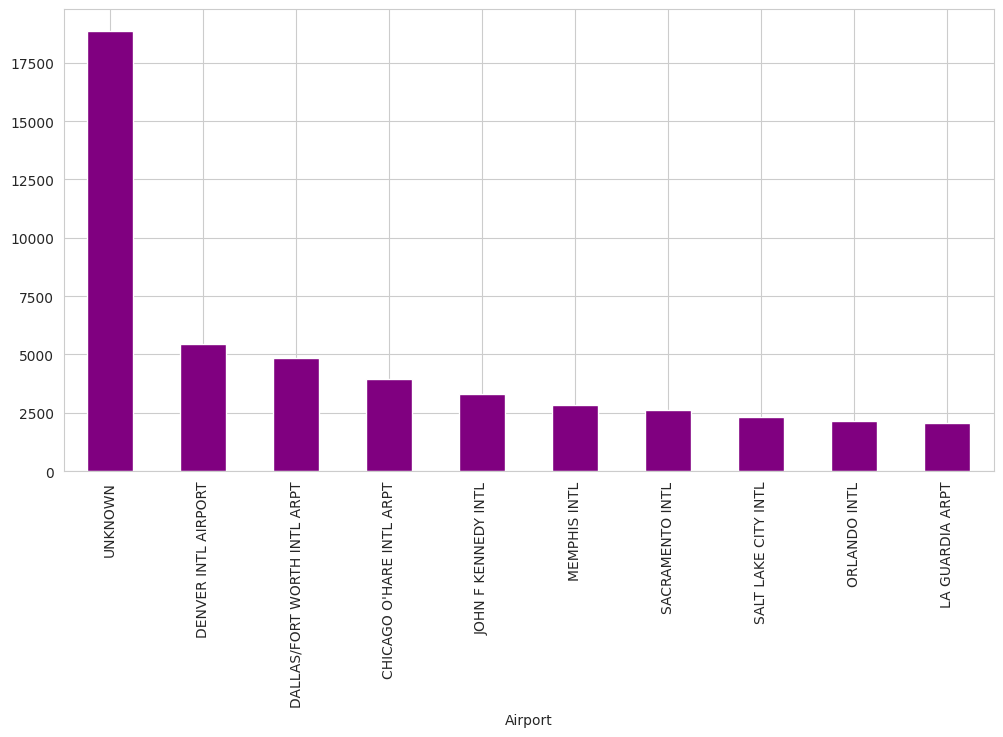

In [ ]:
top_airports = df['Airport'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_airports.plot(kind='bar', color='purple')
plt.show()

In [ ]:
df['Aircraft Damage'].nunique()

2